# Inference for Gaussian Graphical Model

In [1]:
import CovSel
import HD
import ROCKET

In [23]:
# generate covariance
ρ = 0.5
py = 200
px = 1000

function generatePrecision(::Symbol, p, ρ)
    Ω = eye(p)    
    for c=1:p-1        
        Ω[c,c+1] = ρ
        Ω[c+1,c] = ρ    
    end    
    Ω
end

Ωy = generatePrecision(:Chain, py, ρ)
Σx = eye(px)
for c=1:px, r=c+1:px
    Σx[r,c] = ρ
    Σx[c,r] = ρ
end

Γ = zeros(px, py)
for c=1:py
    for r=1:10
        Γ[r,c] = rand()
    end
end

function genData(Σx, Γ, Ωy, n)
    p = size(Σx, 2)
    X = randn(n, p) * sqrtm(Σx)
    Y = X * Γ + CovSel.generateData(Ωy, n)
    X, Y
end



genData (generic function with 1 method)

In [10]:
reload("HD")
reload("CovSel")
reload("ROCKET")

In [ ]:
numRep = 10
n = 400
X = CovSel.generateData(Ω, n)
res = zeros(numRep)
options =  ROCKET.ROCKETOptions(;λ=sqrt(2.*log(p)/n), refit=true)
a = 1
b = 7
for rep=1:numRep
    X = CovSel.generateData(Ω, n)
#     eP, eVar = ROCKET._teInferenceGaussian(X, 1, 7, 2, options)
#     @time eP, eVar = ROCKET._teInferenceGaussian(X, 1, 7, [2,4,5])
    eP, eVar = ROCKET.teInference(X, a, b, 3, 4, options)
    res[rep] = (eP - Ω[a,b]) / sqrt(eVar)
end

In [8]:
import Distributions
import PyPlot

In [ ]:
qq = Distributions.qqbuild(Distributions.Normal(), res) 
PyPlot.scatter(qq.qx, qq.qy)
PyPlot.plot(-4:0.01:4, -4:0.01:4, linestyle="--", color="red")

# Comparison between one stage and two stage methods

In [24]:
srand(123)

numRep = 20
n = 400

res = zeros(numRep)
options =  ROCKET.ROCKETOptions(;λ=sqrt(1.8*log(py+px)), refit=true)
a = 1
b = 2
for rep=1:numRep
    X, Y = genData(Σx, Γ, Ωy, n)
    eP, eVar = ROCKET.teInference([Y X], a, b, 2, 4, options)
    res[rep] = (eP - Ωy[a,b]) / sqrt(eVar)
end

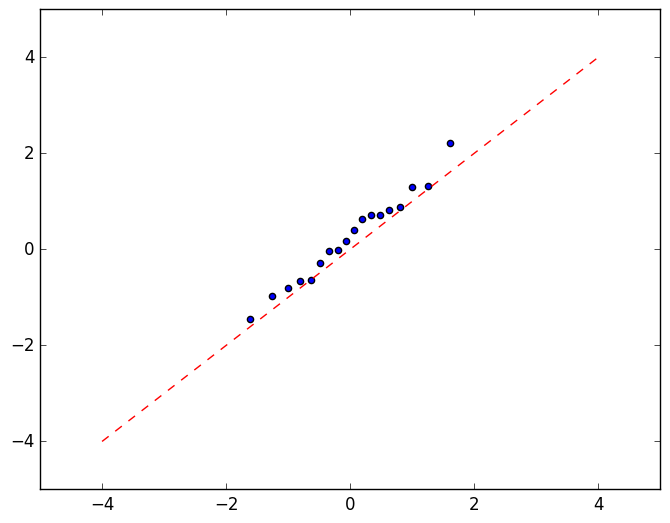

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9299417fd0>

In [25]:
qq = Distributions.qqbuild(Distributions.Normal(), res) 
PyPlot.scatter(qq.qx, qq.qy)
PyPlot.plot(-4:0.01:4, -4:0.01:4, linestyle="--", color="red")

In [ ]:
srand(123)

numRep = 200
n = 400

resTwo = zeros(numRep)
options =  ROCKET.ROCKETOptions(;λ=sqrt(2.*log(py)), refit=true)
a = 1
b = 2
for rep=1:numRep
    @show rep
    X, Y = genData(Σx, Γ, Ωy, n)
    
    scaleX = zeros(px)
    ROCKET._stdColumn!(scaleX, X)
    scale!(scaleX, options.λ)    
    
    Z = copy(Y)
    for j=1:py
#         γ = HD.sqrtLasso(X, Y[:, j], scaleX)
        γ = X[:, 1:10] \ Y[:, j]
#         @show find(x -> abs(x) > 1e-4, γ)
        Z[:,j] = Y[:,j] - X[:,1:10]*γ
    end
    
    eP, eVar = ROCKET.teInference(Z, a, b, 2, 4, options)
    resTwo[rep] = (eP - Ωy[a,b]) / sqrt(eVar)
end

rep = 1
rep = 2
rep = 3
rep = 4
rep = 5
rep = 6
rep = 7
rep = 8
rep = 9
rep = 10
rep = 11
rep = 12
rep = 13
rep = 14
rep = 15
rep = 16
rep = 17
rep = 18
rep = 19
rep = 20
rep = 21
rep = 22
rep = 23
rep = 24
rep = 25
rep = 26
rep = 27
rep = 28
rep = 29
rep = 

In [ ]:
qq = Distributions.qqbuild(Distributions.Normal(), resTwo) 
PyPlot.scatter(qq.qx, qq.qy)
PyPlot.plot(-4:0.01:4, -4:0.01:4, linestyle="--", color="red")